# Breast Cancer Wisconsin

## Define el problema y sus objetivos

El objetivo de nuestro estudio va a ser realizar un módelo que según una serie de características que han sido tomadas del nucleo celular sea capaz de predecir el diagnóstico simplemente analizando estas características.

## Carga y explicación del problema 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 20, 16
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"


#Modelos
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [2]:
data=pd.read_csv("../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv")

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Vamos a definir las columnas, cabe mencionar que estamos trabajando con los datos medios de las observaciones:
* radius= radio observado
* texture = desviación estándar de la escala de grises
* permiter = el perímetro que ocupa el núcleo de la célula
* area = área
* smoothness= Podríamos traducirlo como la suavidad o textura
* diagnosis = Es el diagnóstico que será una variable catagórico, tomando 0 como maligno y  como menigno 1

Vamos ahora a comprobar la cantidad de datos nulos o NAN que tenemos:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


Observamos que afortunadamente tenemos unos datos completos y todos númericos.

In [5]:
#Vamos a observar alguna característica de los datos
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## Exploración de los datos

Exceptuando la columna de diagnosis, podemos ver que son todo variables numerícas contínuas. Dado el caso, vamos a optar por correlacionar características numéricas mediante la visualización, para ver si acabamos haciendo categóricas algunas variables.

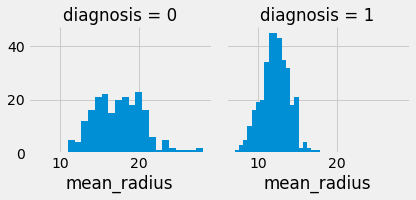

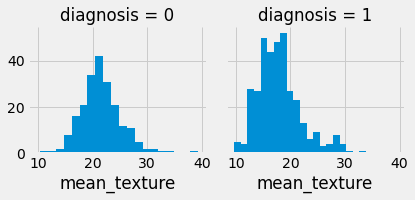

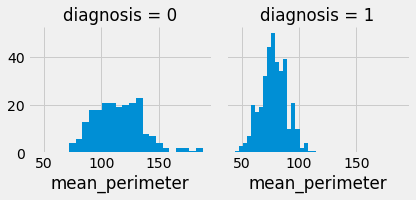

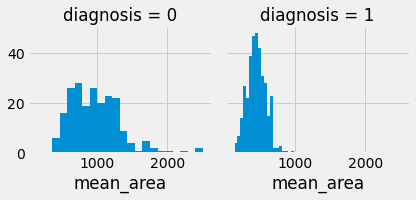

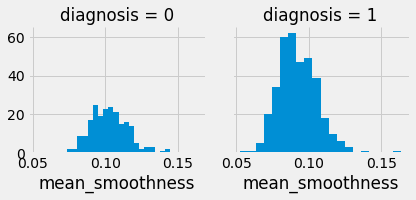

In [6]:
for columna in data.drop(["diagnosis"],axis=1).columns.values.tolist():
    g= sns.FacetGrid(data, col="diagnosis")
    g.map(plt.hist, columna ,bins=20)

Con una primera visualización, podemos ver que realmente todas nuestras columnas parecen tener relevancia. 


No obstante, hay una cosa que me llama la atención, ya que como estamos trabajando con los núcleos de las células y aún no sabiendo mucho acerca de biología pueden ser bastante circulares. Lo que quiero decir con esto es que seguramente, el radio esté relacionado con el área y el perímetro, para ello vamos a realizar unas representaciones.

In [7]:
fig = px.scatter_matrix(data[["mean_area","mean_perimeter","mean_radius"]])
fig.update_layout(title="Matriz de dispersión (Scatter Matrix) para las columnas")
fig.show()

Vemos que hay una relación lineal bastante definida pero para asegurarnos aún más vamos a realizar una matriz de correlación para averiguar el r^2

In [8]:
data2=data.drop(["mean_smoothness","mean_texture","diagnosis"],axis=1)

<AxesSubplot:>

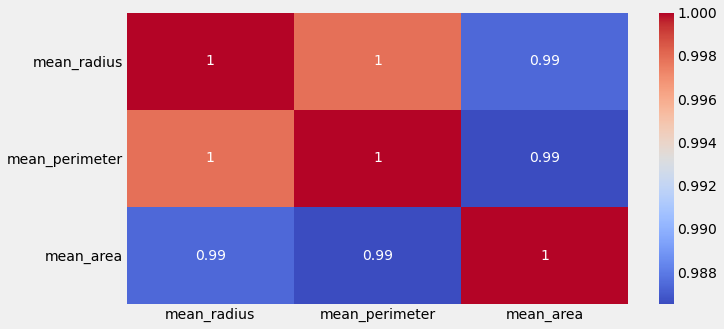

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data2.corr(), annot=True, cmap="coolwarm")

Como sospechábamos se ajustan extremadamente, por lo que a la hora de realizar el modelo usaremos una sola columna de estas, ya que al ser tan dependientes  utilizar las 3 solo haría que hagamos trabajar más al ordenador de manera innecesaria.

In [10]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [11]:
data3=data.drop(["mean_perimeter","mean_area"],axis=1)
data3.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


### Variables numéricas a variables categóricas, mediante la función .cut y la función .map

#### Variable radio

In [12]:
#La variable radios la partimos en 5 y ya sería suficiente
data3['radios'] = pd.cut(data3['mean_radius'], 5)
#La variable texture quedan los rangos mejor definidos si la partimos en 7
data3['texture'] = pd.cut(data3['mean_texture'], 7)
# Smoothness también la cortamos en 5 partes
data3['smooth'] = pd.cut(data3['mean_smoothness'], 5)


Para ver ahora las 7 particiones, vamos a realizar un groupby

In [13]:
data3[["radios","diagnosis"]].groupby(['radios'], as_index=False).mean().sort_values(by='radios', ascending=True)

,radios,diagnosis
0,"(6.96, 11.207]",0.979592
1,"(11.207, 15.433]",0.805732
2,"(15.433, 19.658]",0.076190
3,"(19.658, 23.884]",0.000000
4,"(23.884, 28.11]",0.000000


In [14]:
data3.loc[ data3['mean_radius'] <= 11.207, 'mean_radius'] = 0
data3.loc[(data3['mean_radius'] > 11.027) & (data3['mean_radius'] <= 15.433), 'mean_radius'] = 1
data3.loc[(data3['mean_radius'] > 15.433) & (data3['mean_radius'] <= 19.658), 'mean_radius'] = 2
data3.loc[(data3['mean_radius'] > 19.658) & (data3['mean_radius'] <= 23.884), 'mean_radius'] = 3
data3.loc[ data3['mean_radius'] > 23.884, 'mean_radius']=4

In [15]:
#Eliminamos ya la columna radios
data3=data3.drop(["radios"],axis=1)
data3.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis,texture,smooth
0,2.0,10.38,0.11840,0,"(9.68, 13.934]","(0.0969, 0.119]"
1,3.0,17.77,0.08474,0,"(13.934, 18.159]","(0.0748, 0.0969]"
2,3.0,21.25,0.10960,0,"(18.159, 22.383]","(0.0969, 0.119]"
3,1.0,20.38,0.14250,0,"(18.159, 22.383]","(0.141, 0.163]"
4,3.0,14.34,0.10030,0,"(13.934, 18.159]","(0.0969, 0.119]"


#### Variable texture

In [16]:
data3[["texture","diagnosis"]].groupby(['texture'], as_index=False).mean().sort_values(by='texture', ascending=True)

,texture,diagnosis
0,"(9.68, 13.934]",0.961538
1,"(13.934, 18.159]",0.829787
2,"(18.159, 22.383]",0.518868
3,"(22.383, 26.607]",0.287500
4,"(26.607, 30.831]",0.531250
5,"(30.831, 35.056]",0.250000
6,"(35.056, 39.28]",0.000000


In [17]:
data3.loc[ data3['mean_texture'] <= 13.934, 'mean_texture'] = 0
data3.loc[(data3['mean_texture'] > 13.934) & (data3['mean_texture'] <= 18.159), 'mean_texture'] = 1
data3.loc[(data3['mean_texture'] > 18.159) & (data3['mean_texture'] <= 22.383), 'mean_texture'] = 2
data3.loc[(data3['mean_texture'] > 22.383) & (data3['mean_texture'] <= 26.607), 'mean_texture'] = 3
data3.loc[(data3['mean_texture'] >26.607) & (data3['mean_texture'] <= 30.831), 'mean_texture'] = 4
data3.loc[(data3['mean_texture'] > 30.831) & (data3['mean_texture'] <= 35.056), 'mean_texture'] = 5
data3.loc[(data3['mean_texture'] > 35.056), 'mean_radius'] = 6

In [18]:
#Eliminamos ya la columna texture
data3=data3.drop(["texture"],axis=1)
data3.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis,smooth
0,2.0,0.0,0.11840,0,"(0.0969, 0.119]"
1,3.0,1.0,0.08474,0,"(0.0748, 0.0969]"
2,3.0,2.0,0.10960,0,"(0.0969, 0.119]"
3,1.0,2.0,0.14250,0,"(0.141, 0.163]"
4,3.0,1.0,0.10030,0,"(0.0969, 0.119]"


#### Variable smoothness

In [19]:
data3[["smooth","diagnosis"]].groupby(['smooth'], as_index=False).mean().sort_values(by='smooth', ascending=True)

,smooth,diagnosis
0,"(0.0525, 0.0748]",0.964286
1,"(0.0748, 0.0969]",0.751852
2,"(0.0969, 0.119]",0.477366
3,"(0.119, 0.141]",0.400000
4,"(0.141, 0.163]",0.333333


In [20]:
data3.loc[ data3['mean_smoothness'] <= 0.0748, 'mean_smoothness'] = 0
data3.loc[(data3['mean_smoothness'] > 0.0748) & (data3['mean_smoothness'] <= 0.0969), 'mean_smoothness'] = 1
data3.loc[(data3['mean_smoothness'] > 0.0969) & (data3['mean_smoothness'] <= 0.119), 'mean_smoothness'] = 2
data3.loc[(data3['mean_smoothness'] > 0.119) & (data3['mean_smoothness'] <= 0.141), 'mean_smoothness'] = 3
data3.loc[ data3['mean_smoothness'] > 0.141, 'mean_smoothness']=4

In [21]:
#Eliminamos ya la columna smooth
data3=data3.drop(["smooth"],axis=1)
data3.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,2.0,0.0,4.0,0
1,3.0,1.0,4.0,0
2,3.0,2.0,4.0,0
3,1.0,2.0,4.0,0
4,3.0,1.0,4.0,0


## Modelo a escoger

Como sabemos el resultado de nuestro análisis sabemos que se trata de aprendizaje supervisado y como el resultado solo puede tomar 2 valores 0 o 1 pues sabemos que se trata de clasificación y también de regresión. Dicho esto, vamos a probar unos cuantos modelos de manera directa y cuando seleccionemos los mejores  observaremos las matrices de confusión.

In [22]:
#En primer lugar vamos a separar entre entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(data3.drop(["diagnosis"],axis=1),data3["diagnosis"] , 
                                                    test_size = 0.2, random_state=20)


In [23]:
X_train.head()

,mean_radius,mean_texture,mean_smoothness
412,0.0,2.0,4.0
461,4.0,3.0,4.0
532,1.0,1.0,4.0
495,1.0,2.0,4.0
13,2.0,3.0,4.0


#### Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_logistic = model.predict(X_test)
acc_log = round(accuracy_score(prediction_logistic,y_test) * 100, 2)
print('La precisión (accuracy) de la regresión logistica es {}%'.format(acc_log))

La precisión (accuracy) de la regresión logistica es 87.72%


#### Decision Tree Classifier

In [25]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction_tree = model.predict(X_test)
acc_tree = round(accuracy_score(prediction_tree,y_test) * 100, 2)
print('La precisión (accuracy) del decision tree clasiffier es {}%'.format(acc_tree))

La precisión (accuracy) del decision tree clasiffier es 92.98%


#### Support Vector Machine

In [26]:
model=SVC()
model.fit(X_train,y_train)
prediction_svc=model.predict(X_test)
acc_svc=round(accuracy_score(prediction_svc,y_test) * 100, 2)
print('La precisión (accuracy) del SVC es {}%'.format(acc_svc))

La precisión (accuracy) del SVC es 90.35%


#### k Neighbors Classifier

([<matplotlib.axis.XTick at 0x7f3855eda990>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

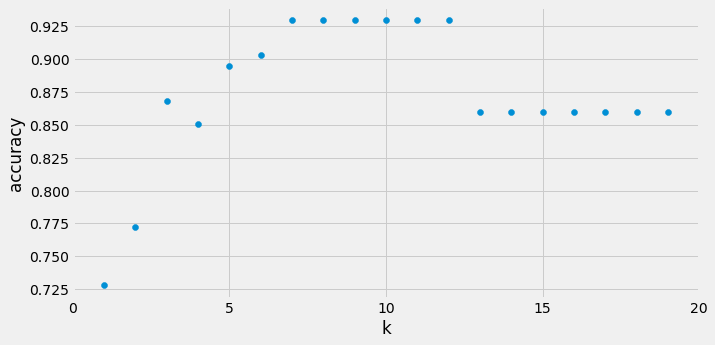

In [27]:
#Para obtener el número de vecinos, debemos ejecutar un pequeño código
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [28]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
acc_knn = round(accuracy_score(prediction_knn,y_test) * 100, 2)
print('La precisión (accuracy) del decision knn es {}%'.format(acc_knn))

La precisión (accuracy) del decision knn es 92.98%


#### Random Forest 

In [29]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)
acc_rf = round(accuracy_score(prediction_rf,y_test)*100,2)
print('La precisión (accuracy) del Random Forest es {}%'.format(acc_rf))

La precisión (accuracy) del Random Forest es 92.98%


#### Gaussian Naive Bayes

In [30]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
acc_gnb=round(accuracy_score(prediction_gnb,y_test) * 100, 2)
print('La precisión (accuracy) de Gaussian Naive Bayes es {}%'.format(acc_gnb))

La precisión (accuracy) de Gaussian Naive Bayes es 85.96%


Una vez ya hemos probado unos cuantos modelos, vamos a ordenarlos para quedarnos con los dos mejores.

In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'Decision Trees',"Random Forest","GaussianNB","KNN"],
    'Score': [acc_log, acc_svc, acc_tree,acc_rf,acc_gnb,acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Trees,92.98
3,Random Forest,92.98
5,KNN,92.98
1,SVC,90.35
0,Logistic Regression,87.72
4,GaussianNB,85.96


Tenemos el mismo accuracy con tres modelos, luego vamos a estudiar random forest y Knn, ya que decision tree es el caso simple de random forest.

### Random Forest(Evaluación del modelo)

In [32]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)
acc_rf = round(accuracy_score(prediction_rf,y_test)*100,2)
print('La precisión (accuracy) del Random Forest es {}%'.format(acc_rf))

La precisión (accuracy) del Random Forest es 92.98%


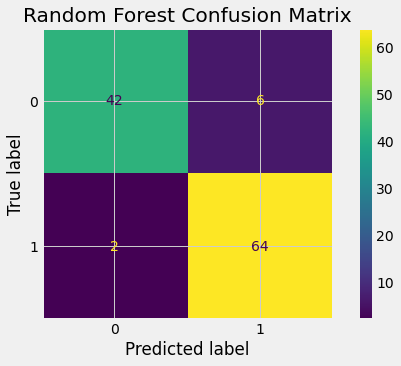

In [33]:
plt.rcParams['figure.figsize'] = 8, 5
plot_confusion_matrix(model, X_test,y_test)

plt.title('Random Forest Confusion Matrix')
plt.show()

In [34]:
# Comprobación (f1-score - accuracy)
report = classification_report(y_test, prediction_rf)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        48
           1       0.91      0.97      0.94        66

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Como observamos en la matriz de confusión, se han marcado solo 8 errores, 6 se maracaron como menignos que eran malignos y 2 como malignos que eran malignos. Si observamos el reporte de clasificación pues vemos que tenemos para ambos casos un gran f1. Luego visto todo esto podemos decir que el random forest es un gran algoritmo de clasificación para este problema.

### KNN(Evaluación)

In [35]:
modelo=KNeighborsClassifier(n_neighbors=8)#Seleccionamos 8, porque ya vimos antes cual coger
modelo.fit(X_train,y_train)
prediction_knn=modelo.predict(X_test)
acc_knn = round(accuracy_score(prediction_knn,y_test) * 100, 2)
print('La precisión (accuracy) del decision knn es {}%'.format(acc_knn))

La precisión (accuracy) del decision knn es 92.98%


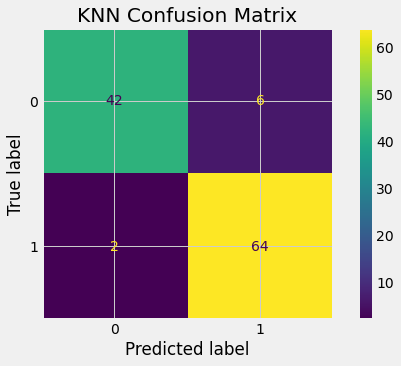

In [36]:
plt.rcParams['figure.figsize'] = 8, 5
plot_confusion_matrix(modelo, X_test,y_test)

plt.title('KNN Confusion Matrix')
plt.show()

In [37]:
report = classification_report(y_test, prediction_knn)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        48
           1       0.91      0.97      0.94        66

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Al comprobar la matriz de confusión y el reporte de clasificación vemos que aciertan lo mismo y fallan en los mismos casos, luego ambos modelos son igual de precisos y cualquiera de ellos nos serviría ya que cuentan con una precisión del 92%